# Data Mining Versuch Music Clustering
* Autor: Prof. Dr. Johannes Maucher
* Datum: 16.10.2015

[Übersicht Ipython Notebooks im Data Mining Praktikum](Data Mining Praktikum.ipynb)

# Einführung
## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Zugriff auf Musikdateien
* Transcodierung von mp3 zu wav 
* Extraktion von Merkmalen in Musikdateien (Feature Extraction)
* Optimierung mit dem genetischen Algorithmus
* Selektion der aussagekräftigsten Merkmale (Feature Selection)
* Clustering von Musikfiles (automatische Playlistgenerierung)


## Vor dem Versuch zu klärende Fragen

### Transcodierung von MP3 nach WAV und Merkmalsextraktion
In diesem Versuch wird der MP3 Decoder [mpg123](http://www.mpg123.de/) eingesetzt. Installieren und testen sie diesen Decoder vor dem Versuch auf ihrem Rechner. Machen Sie sich zunächst mit dem in Kapitel [Gegebene Module zur Transcodierung und Feature Extraction](#Gegebene-Module-zur-Transcodierung-und-Feature-Extraction) aufgeführten Code vertraut. Versuchen Sie Funktion und Ablauf dieses Programms zu verstehen und beantworten Sie folgende Fragen.

1. Was versteht man unter den statistischen Größen _Mittelwert, Standardabweichung, Skewness und Kurtosis_?
2. Was beschreibt die Fourier-Transformierte eines zeitlich ausgedehnten Signals?
3. Mit welcher Samplingrate werden die WAV Dateien abgetastet?
4. Insgesamt werden 42 Merkmale pro Musiksequenz extrahiert. Beschreiben Sie kurz diese Merkmale



##### Klärung der Fragen:

##### 1. Statistische Größen

###### Mittelwert:

Der Mittelwert ist der Durchschnitt einer Zahlenmenge, d.h. die Summe aller Zahlenwerte der Menge geteilt durch die Anzahl der Zahlenwerte.

###### Standardabweichung:

Die Standardabweichung ist eine wichtige mathematische Größe in der Statistik. Sie betrachtet, welche Werte eine Zufallsvariable X in einer Zahlenmenge annnimmt, ermittelt mithilfe des Mittelwerts oder mithilfe des Erwartungswertes den Schwerpunkt der Zahlenmenge und gibt gleichzeitig an, wie sehr die Werte der Zahlenmenge um diesen Schwerpunkt herum streuen.

###### Skewness (dt. Schiefe)

Die Skewness beschreibt, wie die absolute Anzahl der Werte einer Wahrscheinlichkeitsverteilung vom Mittelwert ausgehend zur rechten und zur linken Seite verteilt sind. Bei rechtsschiefen Verteilungen gibt es öfter Werte, die kleiner sind als der Mittelwert, bei linksschiefen Verteilungen ist das Gegenteil der Fall. Ein Beispiel für eine rechtsschiefe Verteilung ist meistens das Pro-Kopf-Einkommen eines Landes, denn dabei fallen einige wenige Menschen mit einem sehr hohen Einkommen stark ins Gewicht gegenüber vielen Leuten mit kleinerem Einkommen.

###### Kurtosis

Die Kurtosis beschreibt die ''Spitzigkeit'' bzw. die Wölbung einer Wahrscheinlichkeitsfunktion. Je größer die Kurtosis, desto spitzer läuft die Funktion auf ihren Mittelwert zu. Liegt bei großer Kurtosis (w > 3) trotzdem eine große Streuung vor, resultiert dies aus wenigen jedoch deutlichen Ausreißern. Ist die Kurtosis dagegen klein (w < 3), sind die Werte gleichmäßiger verteilt. Die Kurtosis wird mithilfe des Mittelwerts und der Standardabweichung der Wahrscheinlichkeitsverteilung normiert, um sie unabhängig von der Einheit der Zufallsvariablen werden zu lassen.


##### 2. Fourier-Transformierte

Darstellung eines aperiodischen kontinuirlichen Signals in Form einer Funktion.

##### 3. Sampling-Rate für WAV-Dateien

10 MB per minute at a 44.1 kHz sample rate using stereo 16-bit samples

##### 4. Merkmale einer Musiksequenz


Von der Amplitude der Musiksignale werden Eigenschaften wie der Durchschnitt, die Standardabweichung und die Skewness verwendet.


###### Notiz: 

Die Mel Frequency Cepstral Coefficients bilden eine Gruppe von ca. 10-20 Features, die ähnlich wie hier die generelle Form und den Verlauf eines Musiksignals beschreiben. Sie gewichten Frequenzen, die für das menschliche Hören wichtiger sind, stärker als Frequenzen, für die dies nicht der Fall ist.


### Matching der Teilsequenzen

1. Nachdem für jedes Musikstück die beiden Teilsequenzen in Form der extrahierten Merkmale vorliegen: Wie kann die Ähnlichkeit zwischen Teilsequenzen ermittelt werden?

    Mit bekannten Algorithmen die Aehnlichkeit zwischen den Vektoren der Merkmale der verschiedenen Teilsequenzen berechnen.
2. Welche Numpy- bzw. Scipy-Module können Sie für die Bestimmung der Ähnlichkeit zwischen Teilsequenzen einsetzen?

    scipy.stats
    scipy.spatial
    sklearn.metrics.pairwise

### Genetischer Algorithmus für die Merkmalsselektion

1. Beschreiben Sie die Prozesschritte im genetischen Algorithmus [Genetischer Algorithmus](https://www.hdm-stuttgart.de/~maucher/Python/FunktionenAlgorithmen/html/genAlgTSP.html)
    1. Erzeugung einer zufaelligen Population: Am Anfang wird eine Anzahl zufaelliger Chromosomen erzeugt. Diese
    werden nur einmal ganz am Anfang erzeugt.
    2. Berechnung der Fitness: Mit der Fitnessfunktion wird der Fitness-Wert fuer alle Chromosomen berechnet.
    3. Selektion: Pseudo-Zufaellige Auswahl von Chromosomen-Paaren, die aus Population "gepaart" werden. Je hoeher die Fitness,
    desto wahrscheinlicher ist es, dass das Chromosom fuer die Paarung ausgewaehlt wird.
    4. Crossover: Hier werden die ueberlebenden Chromosomen an einem zufaelligen Kreuzungspunkt miteinander
    vermischt. Dadurch entstehen neue Chromosomen mit neuen Konfigurationen.
    5. Mutation: Eine kleine Menge von Chromosomen wird zufaellig veraendert um Varianz zu erzeugen.
    6. Austausch: Nun werden eine bestimme Anzahl von Chromosomen mit den schlechtesten Fitness-Werten durch
    die neu enstandenen Chromosomen-Kinder ersetzt.
    7. Schritt 2 - 6 wird bis zu einer Vorbestimmen Abbruchbedingung wiederholt.
2. In diesem Versuch wird davon ausgegangen, dass Merkmale dann gut sind, wenn durch sie die erste Teilsequenz eines Musikstücks durch einen ähnlichen Vektor wie die jeweils zweite Teilsequenz beschrieben wird. Wie kann mit dieser Annahme der genetische Algorithmus für die Merkmalsselektion angewandt werden. Unter Merkmalsselektion versteht man allgemein die Suche nach den $r$ besten Merkmalen aus einer Menge von insgesamt $R$ Merkmalen. In diesem Versuch werden initial $R=42$ Merkmale extrahiert, aus denen dann die besten $r<R$ Merkmale zu bestimmen sind. Überlegen Sie hierfür speziell wie die Fitnessfunktion, die Kreuzung und die Mutation zu realisieren sind.
    - Als Fitness-Funktion koennte man den Unterschied der Vektoren der Merkmale fuer die jeweils erste und zweite
    Teilsequenz des Musikstuecks berechnen.
    - Kreuzung koennte so realisiert werden, dass zwei Elternchromosomen zufaellige ausgewaehlt werden. Je hoeher die
    Fitness, desto groesser die Wahrscheinlichkeit, dass ein Chromosom ausgewaehlt wird. Bei der eigentlichen Kreuzung
    koennten dann neue Kind-Chromosomen mit einer zufaelligen Auswahl aus einem Set an alle Eltern-Merkmalen kombiniert
    werden.
    - Mutation koennte bedeuten, zufaellige Merkmale in den Merkalsmengen zu loeschen, neue noch nicht vorhandene
    Mermkmale hinzuzufuegen, oder ein vorhandenes Merkmal mit einem zufaelligen anderen noch nicht vorhandenen Merkmal
    ersetzen.

### Clustering und Playlistgenerierung

1. Wie kann mit einem hierarchischen Clustering der Musikfiles eine Menge von Playlists erzeugt werden, so dass innerhalb einer Playlist möglichst ähnliche Titel zu finden sind?

   Top-Down-Apporach: Die gegebenen Musiktitel befinden sich in einem großen Cluster. Wenn die Ähnlichkeit zwischen allen Musikstücken gegeben ist, kann immer ein Schwellenwert als Trennpunkt definiert werden
    an dem jeweils zwei Cluster sich trennen. Dies kann dann hierarchisch für die enstandenen Cluster
    absteigend wiederholt werden, bis das gewünschte Level an Clustering erreicht ist.
    
    Bottom-Up-Apporach: Jeder Musiktitel bildet ein eigenes Cluster. In jeder Iteration des Clusteralgorithmus wird daraufhin geprüft, ob ein Musiktitel aufgrund von großer Ähnlichkeit einem anderen Cluster zugeordnet werden sollte. Die Cluster mit einem Musiktitel werden so schrittweise in inzwischen bestehenden größeren Cluster ''hineingemerged''.


# Durchführung
## Gegebene Module zur Transcodierung und Feature Extraction
Mit dem in diesem Abschnitt gegebenen Code werden die im Unterverzeichnis _BandCollection_ befindlichen mp3-Files zunächst in wave decodiert. Danach werden aus den wave Dateien Audiomerkmale erhoben.

Von jedem Musikstück werden zwei disjunkte Teilsequenzen erhoben und von beiden Teilsequenzen jeweils ein Merkmalsvektor gebildet. Der Grund hierfür ist: Für die später folgende Bestimmung der wichtigsten Merkmale (Merkmalsselektion mit dem genetischen Algorithmus), wird angenommen dass Merkmale dann gut sind, wenn die aus ihnen gebildeten Merkmalsvektoren für Teilsequenzen des gleichen Musikstücks nahe beieinander liegen und die Merkmalsvektoren von Teilsequenzen unterschiedlicher Musikstücke weiter voneinander entfernt sind. In der Merkmalsselektion werden dann die Merkmale als relevant erachtet, für die diese Annahme zutrifft. 

**Aufgaben:**

1. Stellen Sie im unten gegebenen Code die Verzeichnisse für Ihre Musikdateien (aktuell Unterverzeichnis _BandCollection_) und für den Ort Ihres _mpg123_ Decoders richtig ein.
2. Die verwendete Musiksammlung sollte mindestens 5 verschiedene Interpreten möglichst unterschiedlicher Genres enthalten. Von jedem Interpret sollten mehrere Titel (evtl. ein ganzes Album) enthalten sein.
3. Führen Sie den in diesem Abschnitt gegebenen Programmcode zur Audiofeature-Extraction aus. Damit werden für alle Musiksequenzen jeweils 42 Merkmale extrahiert. Die extrahierten Merkmalsvektoren der jeweils ersten Sequenz werden in das File _FeatureFileTrainingAllList1.csv_ geschrieben, die der zweiten Teilsequen in das File _FeatureFileTestAllList2.csv_. 


In [ ]:
import json
import subprocess
import wave
import struct
from multiprocessing import cpu_count

import numpy
import os

import numpy as np
import pandas as pd
from IPython.core.display import clear_output
from joblib import Parallel, delayed
from matplotlib import pyplot as plt
from pandas import DataFrame, Series
from scipy.cluster.hierarchy import linkage, dendrogram

numpy.set_printoptions(precision=2, suppress=True)

#Names of features extracted in this module
FeatNames = ["amp1mean", "amp1std", "amp1skew", "amp1kurt", "amp1dmean", "amp1dstd", "amp1dskew", "amp1dkurt",
             "amp10mean", "amp10std",
             "amp10skew", "amp10kurt", "amp10dmean", "amp10dstd", "amp10dskew", "amp10dkurt", "amp100mean", "amp100std",
             "amp100skew",
             "amp100kurt", "amp100dmean", "amp100dstd", "amp100dskew", "amp100dkurt", "amp1000mean", "amp1000std",
             "amp1000skew",
             "amp1000kurt", "amp1000dmean", "amp1000dstd", "amp1000dskew", "amp1000dkurt", "power1", "power2", "power3",
             "power4",
             "power5", "power6", "power7", "power8", "power9", "power10"]

In [ ]:
def moments(x):
    mean = x.mean()
    std = x.var() ** 0.5
    skewness = ((x - mean) ** 3).mean() / std ** 3
    kurtosis = ((x - mean) ** 4).mean() / std ** 4
    return [mean, std, skewness, kurtosis]

In [ ]:
#Feature category 2: Frequency domain parameters
def fftfeatures(wavdata):
    f = numpy.fft.fft(wavdata)
    f = f[2:int(f.size / 2 + 1)]
    f = abs(f)
    total_power = f.sum()
    f = numpy.array_split(f, 10)
    return [e.sum() / total_power for e in f]

In [ ]:
#Creating the entire feature vector per music-file
def features(x):
    x = numpy.array(x)
    f = []

    xs = x
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 10).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 100).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    xs = x.reshape(-1, 1000).mean(1)
    diff = xs[1:] - xs[:-1]
    f.extend(moments(xs))
    f.extend(moments(diff))

    f.extend(fftfeatures(x))
    return f

In [ ]:
def read_wav(wav_file):
    """Returns two chunks of sound data from wave file."""
    w = wave.open(wav_file)
    n = 60 * 10000
    if w.getnframes() < n * 3:
        raise ValueError('Wave file too short')
    #For each music file 2 sequences, each containing n frames are subtracted. The first sequence starts at postion n,
    #the second sequence starts at postion 2n. The reason for extracting 2 subsequences is, that later on we like to
    #find the best features and in this exercise we assume that good features have the property that they are similar for 2 subsequences
    #of the same song, but differ for subsequences of different songs.
    w.setpos(n)
    frames = w.readframes(n)
    wav_data1 = struct.unpack('%dh' % n, frames)
    frames = w.readframes(n)
    wav_data2 = struct.unpack('%dh' % n, frames)
    return wav_data1, wav_data2

In [ ]:
def compute_chunk_features(mp3_file):
    """Return feature vectors for two chunks of an MP3 file."""
    # Extract MP3 file to a mono, 10kHz WAV file
    #mpg123_command = 'C:\Program Files (x86)\mpg123-1.22.0-x86\mpg123-1.22.0-x86\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    #mpg123_command = 'C:\\Program Files (x86)\\mpg123-1.21.0-x86-64\\mpg123.exe -w "%s" -r 10000 -m "%s"'
    mpg123_command = r'mpg123 -w "%s" -e s16 -r 10000 -m "%s"'
    with open("mpg123_command.txt", "r") as command_file:
        mpg123_command = command_file.readlines()[0]
    out_file = 'temp.wav'
    cmd = mpg123_command % (out_file, mp3_file)
    temp = subprocess.call(cmd, shell=True)
    # Read in chunks of data from WAV file
    wav_data1, wav_data2 = read_wav(out_file)
    # We'll cover how the features are computed in the next section!
    return numpy.array(features(wav_data1)), numpy.array(features(wav_data2))

In [ ]:
first_list = "FeatureFileTrainingAllList1.csv"
second_list = "FeatureFileTestAllList2.csv"

if not os.path.isfile(first_list) and not os.path.isfile(second_list):
    fileList = []
    featureList1 = []
    featureList2 = []
    #Specify the name of the directory, which contains your MP3 files here.
    # This directory should contain for each band/author one subdirectory, which contains all songs of this author
    for path, dirs, files in os.walk('./BandCollection'):
        #print '-'*10,dirs,files
        for f in files:
            if not f.endswith('.mp3'):
                # Skip any non-MP3 files
                continue
            mp3_file = os.path.join(path, f)
            print(mp3_file)
            # Extract the track name (i.e. the file name) plus the names
            # of the two preceding directories. This will be useful
            # later for plotting.
            tail, track = os.path.split(mp3_file)
            tail, dir1 = os.path.split(tail)
            tail, dir2 = os.path.split(tail)
            # Compute features. feature_vec1 and feature_vec2 are lists of floating
            # point numbers representing the statistical features we have extracted
            # from the raw sound data.
            try:
                feature_vec1, feature_vec2 = compute_chunk_features(mp3_file)
            except:
                print("Error: Chunk Features failed")
                continue
            #title=str(track)
            title = str(dir1) + '\\' + str(track)
            print('-' * 20 + title + '-' * 20)
            #print "       feature vector 1:",feature_vec1
            #print "       feature vector 2:",feature_vec2
            fileList.append(title)
            featureList1.append(feature_vec1)
            featureList2.append(feature_vec2)

    # Write feature vecotrs of all music files to pandas data-frame
    MusicFeaturesTrain = pd.DataFrame(index=fileList, data=numpy.array(featureList1), columns=FeatNames)
    MusicFeaturesTrain.to_csv(first_list)

    MusicFeaturesTest = pd.DataFrame(index=fileList, data=numpy.array(featureList2), columns=FeatNames)
    MusicFeaturesTest.to_csv(second_list)
else:
    print("Feature lists already created, skipping...")

## Matching der Teilsequenzen
In diesem Abschnitt soll ein Verfahren implementiert werden, mit dem die Übereinstimmung der ersten Teilsequenz eines Musikstücks mit den zweiten Teilsequenzen aller anderen Musikstücke berechnet werden kann.

**Aufagben:**
1. Lesen Sie die im vorigen Teilversuch angelegten zwei csv-Dateien in jeweils einen eigenen Pandas Dataframe ein.
2. Skalieren Sie beide Teilsequenzmengen, so dass alle Merkmale eine Standardabweichung von 1 aufweisen. Z.B. mit [http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html).
2. Bestimmen Sie zu jeder Teilsequenz aus der Datei _FeatureFileTrainingAllList1.csv_ die euklidische Distanz zu allen Teilsequenzen aus der Datei _FeatureFileTestAllList2.csv_ und schreiben Sie diese Distanzen in eine aufsteigend geordnete Liste. Schreiben Sie auch die zugehörigen Argumente (Teilsequenzen) in eine geordnete Liste, sodass für jede Teilsequenz aus _FeatureFileTrainingAllList1.csv_ die am nächsten liegende Teilsequenz aus _FeatureFileTestAllList2.csv_ an erster Stelle steht, die zweitnächste Teilsequenz an zweiter usw.
3. Bestimmen Sie über alle Teilsequenzen aus _FeatureFileTrainingAllList1.csv_ den **mittleren Rang** an dem die zugehörige zweite Teilsequenz erscheint. Liegt z.B. für die erste Teilsequenz des Musikstücks A die zweite Teilsequenz nur an fünfter Stelle der geordneten nächsten Nachbarliste. Dann würde diese Teilsequenz mit dem Rang 5 in den Mittelwert einfließen.
4. Bestimmen Sie jetzt den mittleren Rang, für den Fall, dass _correlation_ anstelle _euclidean_ als Ähnlichkeitsmaß verwendet wird. Welches Ähnlichkeitsmaß ist für diese Anwendung zu bevorzugen?
5. Diskutieren Sie das Ergebnis


Zuerst werden die beiden in der bisherigen Versuchsdurchführung generierten CSV-Listen als DataFrames eingelesen und nach Titel sortiert.

In [ ]:
features_train = pd.read_csv("FeatureFileTrainingAllList1.csv", index_col=0).sort_index()
features_test = pd.read_csv("FeatureFileTestAllList2.csv", index_col=0).sort_index()
features_train.head(10)

In [ ]:
features_test.head(10)

Damit später Zeilen und Daten nicht verwechselt werden, wird der sortierte Index in einer Liste gespeichert, um ihn
danach wieder eindeutig zuordnen zu koennen.

In [ ]:
index = features_train.index.values.tolist()
index[:10]

Um einen Einblick in die Werte dieses Dataframes zu bekommen, wird dieser nur einmal geplottet.

In [ ]:
features_train.boxplot(vert=False, figsize=(15, 15))

Wenn man sich die Ausgaben der DataFrames anschaut, kann man erkennen, dass es bei den Standardabweichungen sehr hohe
Differenzen zwischen den Titeln gibt. Alle anderen Merkmale spielen sich nur in einem relativ kleinen Bereich um 0
herum ab.

Im Folgenden werden diese Eingabewerte genommen und mithilfe des *preprocessing* Moduls von *scikitlearn* skaliert, sodass
sie normalisiert sind. Dies ist notwendig, da sonst Unterschiede zwischen den Werten der Merkmale von Algorithmen wie
der euklidischen Distanz nicht richtig berechnet werden.
Die Daten werden dabei um 0 herum zentriert und auf eine uniforme Standardabweichung skaliert.

In [ ]:
from sklearn.preprocessing import scale

scaled_first_sections = DataFrame(scale(features_train, with_mean=True, with_std=True, copy=True), columns=FeatNames,
                                  index=index)
scaled_second_sections = DataFrame(scale(features_test, with_mean=True, with_std=True, copy=True), columns=FeatNames,
                                   index=index)
scaled_first_sections.head(10)

In [ ]:
scaled_first_sections.boxplot(vert=False, figsize=(15, 15))

Wie man gut erkennen kann, sind nun alle Merkmale sinnvoll verteilt, und das berechnen von Aehnlichkeitswerten, z.B. mithilfe
der euklidischen Distanz sollte sinnvolle Ergebnisse liefern. Die Mittelwerte, also zum Beispiel *amp100mean*, sind
eng verteilt, während es einige Ausreißer, vor allem ins negative. gibt. Diese Merkmale könnten unter gewissen Umständen Verzerrungen mit Algorithmen wie dem euklidischen erzeugen.

Jetzt geht es darum, die Ähnlichkeiten zwischen den verschiedenen Teilsequenzen zu ermitteln.
Es wird jeweils eine Teilsequenz aus der Liste der ersten Teilsequnzen genommen und daraufhin mithilfe eines gegebenen Ähnlichkeitsmaßes die Ähnlichkeit zu jeder Teilsequenz aus der Liste der zweiten Teilsequenzen berechnet. Dies wird für alle ersten Teilsequenzen gemacht, sodass am Ende eine Tabellenstruktur mit den ersten Teilsequenzen als Spalten und
die jeweiligen zweiten Teilsequenzen als Zeilen, sortiert nach absteigender Ähnlichkeit, entsteht.


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances


def get_similar_items(scaled_first_sections, scaled_second_sections, index, similarity_metric):
    df_dist = DataFrame(
        1 / (1 + pairwise_distances(scaled_first_sections, scaled_second_sections, metric=similarity_metric)),
        index=index)
    dist_dict = {index[i]: df_dist[i].sort_values(ascending=False).index.tolist() for i in range(len(index))}
    return dist_dict


most_similar_songs_euclidean = get_similar_items(scaled_first_sections, scaled_second_sections, index, "euclidean")
print(most_similar_songs_euclidean)
DataFrame.from_dict(most_similar_songs_euclidean).head(10)

Wie man in der Ausgabe des DataFrames sehen kann, ist bei vielen Titeln die zweite Teilsequenz am ähnlichsten zu der
ersten. Um diese Hypothese für alle Daten zu validieren, wird eine Funktion implementiert, die die Position der jeweiligen zweiten
Teilsequenz eines Musiktitels in der Liste der ähnlichsten Teilsequenzen für jede erste Teilsequenz ermittelt.

Mit diesen Daten kann dann mit der zweiten Funktion *get_middle_rank* der mittlere Rang, also die durchschnittliche
Position der jeweiligen zweiten Teilsequenz in der Liste pro erste Teilsequenz, ermittelt werden.

In [ ]:
def get_ranks(similar_items):
    return {item: ranking_list.index(item) + 1 for item, ranking_list in similar_items.items()}


def get_middle_rank(items_dict):
    ranks = get_ranks(items_dict)
    return sum(ranks.values()) / len(ranks)


ranks_euclidean = get_ranks(most_similar_songs_euclidean)
df_ranks_euclidean = DataFrame.from_dict(ranks_euclidean, orient="index", columns=["Second part rank with euclidean"])
df_ranks_euclidean.head(10)

In [ ]:
df_ranks_euclidean.plot(kind='hist', title="Rank Distribution", figsize=(10, 10))
middle_rank_euclidean = get_middle_rank(most_similar_songs_euclidean)
f"Middle rank of each sons second part compared to its first: {middle_rank_euclidean}"


##### Beobachtung:
In fast allen Fällen ist die zweite Sequenz eines Songs am ähnlichsten seiner ersten. Allerdings gibt es auch einige Title, bei denen dies nicht der Fall ist. Vor allem der Wert bei **Garrett\02 Who Wants to Live Forever_ 1.mp3** ist mit dem Rang 54 ein extremer Ausreißer und beeinflusst somit den Durchschnitt maßgeblich.

Jetzt werden die *middle ranks* für den selben Datensatz mit **correlation** als Ähnlichkeitsmaß berechnet.

In [ ]:
most_similar_songs_correlation = get_similar_items(scaled_first_sections, scaled_second_sections, index, "correlation")
ranks_correlation = get_ranks(most_similar_songs_correlation)

df_ranks_correlation = DataFrame.from_dict(ranks_correlation, orient="index",
                                           columns=["Second part rank with correlation"])
df_ranks_correlation.plot(kind='hist', title="Rank Distribution", figsize=(10, 10))
middle_rank_correlation = get_middle_rank(most_similar_songs_correlation)
f"Middle rank of each sons second part compared to its first: {middle_rank_correlation}"

Das *correlation*-Ähnlichkeitsmaß erzeugt durchaus genauere Ergebnisse, was sich am mittleren Rang erkennen lässt.
Daraus lässt sich schließen, dass das *correlation*-Ähnlichkeitsmaß besser für den weiteren Verlauf dieser Aufgabe
geeignet ist, da es die Ähnlichkeiten besser darstellt. Des Weiteren gibt es mit *correlation* nicht so weit entfernte Ausreißer.

Und darüber hinaus haben lineare, große Abstände im *correlation*-Ähnlichkeitsmaß keine Verschlechterung im Erkennen der Ähnlichkeit zur Folge, was bedeuten könnte, dass progressive Musiktitel, also Titel, die sich zwar in der Struktur nicht verändern,
jedoch im Verlauf des Songs durchaus lauter bzw. intensiver werden, 
nicht zwangsläufig als unähnlich erkannt werden.

## Merkmalsauswahl mit dem genetischen Algorithmus
In diesem Abschnitt soll unter Anwendung eines selbst zu implementierenden genetischen Algorithmus eine Untermenge wichtiger Merkmale aus den insgesamt 42 angelegten Merkmalen berechnet werden.
Als Vorlage kann hierfür die Implementierung für die [Lösung des TSP Problems](https://www.hdm-stuttgart.de/~maucher/Python/FunktionenAlgorithmen/html/genAlgTSP.html) herangezogen werden. Anzupassen sind dann jedoch mindestens die Fitness-Funktion, die Kreuzungs- und die Mutationsfunktion. Die Fitness soll so wie im vorigen Teilabschnitt mit dem mittleren Rang berechnet werden. Die Populationsgröße, die Anzahl der auszuwählenden Merkmale und die Anzahl der Iterationen sollen als Parameter einstellbar sein.

Der Fitnesswert des besten Individuums in der Population soll in jeder Iteration gespeichert werden. Der Verlauf dieses besten Fitness-Wertes über den Fortlauf der Iterationen soll graphisch ausgegeben werden.

Ein Pandas Frame, der nur die berechneten wichtigsten Merkmale aus _FeatureFileTrainingAllList1.csv_ enthält soll angelegt und in die csv Datei _subFeaturesTrain1.csv_ geschrieben werden.

**Aufgaben:**
1. Implementieren Sie die die Merkmalsauswahl mit dem genetischen Algorithmus entsprechend der o.g. Beschreibung
2. Beschreiben Sie kurz das Konzept ihrer Kreuzungs- und Mutationsfunktion. 
3. Bestimmen Sie eine möglichst kleine Merkmalsuntermenge mit einem möglichst guten mittleren Rang? Geben Sie sowohl die gefundenen wichtigsten Merkmale als auch den zugehörigen mittleren Rang an.
4. Um wieviel verschlechtert sich der Mittlere Rang, wenn nur die 10 wichtigsten Merkmale benutzt werden?

#### Genetischer Algorithmus für die Music Feature Selection

*Funktion für die zufaellige Auswahl von Chromosomen*

In [ ]:
import namegenerator
from numpy.random import choice


def get_random_population(population_size, num_of_features=len(FeatNames), random=False):
    return {namegenerator.gen(): choice(FeatNames, num_of_features,
                                        replace=False).tolist() if random else FeatNames[:num_of_features]
            for _ in range(population_size)}


population = get_random_population(16, random=True)

DataFrame.from_dict(population, orient="index").head(10)

Die folgende Funktion berechnet den Fitness-Wert für ein gegebenes Chromosom. Die Ähnlichkeits-Metrik kann beliebig
gewählt werden. Der Fitness-Wert wird dabei durch die Funktion $10 * ( 1 / fitness)$ dargestellt. Die lineare Skalierung
mit dem Faktor 10 wurde gewählt, umd den Verlauf besser in einem Graphen darzustellen. Er verändert allerdings nichts
an der Funktionsweise oder dem Ergebnis.

In [ ]:
def get_single_fitness(feature_chromosome, first_parts, second_parts, sim_metric="euclidean"):
    distances = get_similar_items(first_parts[feature_chromosome],
                                  second_parts[feature_chromosome],
                                  range(len(first_parts)), sim_metric)
    return 1 / get_middle_rank(distances) * 10


Die folgende Funktion berechnet die Fitness-Werte einer ganzen Population mit der vorherigen *get_single_fitness*-Funktion.

In [ ]:
def get_population_fitness(population, first_parts, second_parts, sim_metric='euclidean'):
    fitness_values = Parallel(n_jobs=cpu_count() * 2 + 1)(
        delayed(get_single_fitness)(value, first_parts, second_parts, sim_metric) for chromosome, value in
        population.items())
    fitness_dict = dict(
        sorted(zip(population.keys(), fitness_values),
               key=lambda x: x[1],
               reverse=True))
    return fitness_dict

In [ ]:
fitness_values = get_population_fitness(population, scaled_first_sections, scaled_second_sections)
fitness_values

Die folgende Funktion berechnet ein Set an Statistiken fuer eine gegebene Population.

In [ ]:
def get_population_stats(population, population_fitness):
    fitness_average = sum(population_fitness.values()) / len(population_fitness)
    feature_lengths = [len(x) for x in population.values()]
    stats = {"fitness_average": fitness_average,
             "best_fitness": population_fitness[list(population_fitness)[0]],
             "worst_fitness": population_fitness[list(population_fitness)[-1]],
             "average_feature_length": sum(feature_lengths) / len(population),
             "max_feature_length": max(feature_lengths),
             "min_feature_length": min(feature_lengths)
             }
    return stats

In [ ]:
def get_middle_rank_for_population(population, first_parts, second_parts, sim_metric):
    middle_ranks = {chromosome: get_middle_rank(
        get_similar_items(
            first_parts[features],
            second_parts[features],
            range(len(first_parts)),
            sim_metric))
        for chromosome, features in population.items()}
    average_middle_rank = sum(middle_ranks.values()) / len(middle_ranks)
    return average_middle_rank

Die folgende Funktion gibt ein Set an Statistiken fuer eine gegebene Population und ihre Fitness-Werte aus.

In [ ]:
def print_population_stats(population, fitness_values):
    df = DataFrame.from_dict(fitness_values, orient='index', columns=["Fitness Values"])
    df.plot(kind='barh', figsize=(10, 10), title="Fitness Values of current population")

In [ ]:
print_population_stats(population, fitness_values)

Basierend auf den Fitness-Werten als Wahrscheinlichkeitsverteilung selektiert die folgende Funktion zufällig eine gegebene Menge an Paaren. Die *choice*-Funktion aus *numpy* bietet die Möglichkeit, ohne Zurücklegen zu ziehen,
und zusätlich dazu, die Wahrscheinlichkeitsverteilung für jedes ziehbare Item anzugeben, was ideal für den
Anwendungsfall mit verschiedenen Fitness-Werten ist. Die Anzahl an gezogenen Paaren kann ebenfalls dynamisch angepasst werden.

In [ ]:

def select_chromosomes(population, fitness_values, num_of_pairs=1):
    probability_distribution = [x * (1 / max(fitness_values.values())) for x in fitness_values.values()]
    s_prob = sum(probability_distribution)
    probability_distribution_normalized = [x / s_prob for x in probability_distribution]
    pairs = choice(list(population.keys()),
                   (num_of_pairs, 2),
                   p=list(probability_distribution_normalized),
                   replace=False).tolist()

    return pairs

In [ ]:
pairs = select_chromosomes(population, fitness_values, 1)
pairs

Die folgende Funktion kreuzt eine gegebene Menge an Chromosomenpaaren so miteinander, dass zufällige Kind-Chromosomen entstehen. Der Parameter *random_remove* kann genutzt werden, um zufällige Werte aus den Kinder-Chromosomen zu entfernen und Randomeness zu erzeugen.

Dabei wird sich ebenfalls der *choice*-Funktion aus *numpy* bedient, um eine vollkommen
zufällige Verteilung von Merkmalen in den Kinder-Chromosomen zu gewährleisten. Wer Elternteil 1 oder 2 ist, wird ebenfalls zufällig ermittelt, um eine weitere Varianz miteinzubauen.

Um die Chromosomen später einfacher identifizieren zu können, wird ein *namegenerator* genutzt, der für jedes Chromosom 
einen individuellen Namen generiert.

In [ ]:
def crossover(pairs, population, random_remove=False, remove_prob=0.2):
    def create_children(pair, population):
        rand = np.random.rand()
        if rand > 0.5:
            p1 = population[pair[0]]
            p2 = population[pair[1]]
            child_length = len(p1)
        else:
            p1 = population[pair[1]]
            p2 = population[pair[0]]
            child_length = len(p2)

        all_features = set(p1 + p2)

        c1 = list(choice(list(all_features), child_length, replace=False))
        c2 = list(choice(list(all_features), child_length, replace=False))

        assert len(c1) == child_length
        assert len(c2) == child_length

        if random_remove:
            keep_prob = 1 - remove_prob
            rand = np.random.rand()
            if rand > keep_prob:
                del c1[int(rand * len(c1))]

        return {namegenerator.gen(): c for c in (c1, c2)}

    children = {c: v for pair in pairs for c, v in create_children(pair, population).items()}
    return children

In [ ]:
children = crossover(pairs, population)
DataFrame.from_dict(children, orient="index")

Die folgende Funktion mutiert eine Menge an gegebenen Kindern mit einer gegebenen Wahrscheinlichkeit. Eine Mutation ist
die Ersetzung eines Merkmals mit einem zufällig ausgewählten anderen, welches sich noch nicht im Chromosom befindet.

Zusätzlich gibt es noch die Funktionalität, Mutationen in Form eines gelöschten oder neu hinzugefügten Merkmals zu verwenden, auf die allerdings nach Überlegen verzichtet wurde, da sie nicht mit dem theoretischen Gedanken des genetischen Algorithmus übereinstimmen.

In [ ]:
def mutate(children, mut_prob):
    def mutate_remove(c1):
        feature = np.floor(np.random.rand(1) * len(c1))
        if feature < (mut_prob * len(c1)) and len(c1) > 1:
            c1 = c1.copy()
            del c1[int(feature)]
        return c1

    def mutate_add(c1):
        new_feature_list = list(set(FeatNames).difference(c1))
        if len(new_feature_list) == 0:
            return c1

        index = int(np.random.rand() * len(new_feature_list))
        new_feature = new_feature_list[index]
        c1 = c1.copy()
        return c1 + [new_feature]

    def mutate_replace(c1):

        new_feature_list = list(set(FeatNames).difference(c1))
        feature = np.floor(np.random.rand(1) * len(c1))

        if len(c1) > 0:
            index = int(np.random.rand() * len(new_feature_list))
            if len(new_feature_list) > 0:
                new_feature = new_feature_list[index]
                c1_new = c1.copy() + [new_feature]
                del c1_new[int(feature)]
                assert len(c1) == len(c1_new)
                return c1_new
            else:
                return c1

        return c1

    def mutate(c1):
        if np.random.rand() > mut_prob:
            return c1

        # return mutate_add(c1) if np.random.rand() > 0.5 else mutate_remove(c1)
        return mutate_replace(c1)

    mutated = {c: mutate(v) for c, v in children.items()}
    return mutated

In [ ]:
mutated_children = mutate(children, 1)
DataFrame.from_dict(mutated_children, orient="index")

Die folgende Funktion ersetzt die schlechtesten Chromosomen in einer Population mit den neu entstandenen Kindern, falls
diese eine bessere Fitness vorweisen.

In [ ]:
def replace_if_better(population, population_fitness, mutated_children, first_sections, second_sections):
    children_fitness = get_population_fitness(mutated_children, first_sections, second_sections)

    def replace_chromosome(population, population_fitness,
                           mutated_children, children_fitness, first_section, second_section):
        if len(mutated_children) == 0 or not mutated_children:
            return population

        child = list(mutated_children)[0]
        worst = list(population_fitness)[-1]
        new_population = population.copy()
        new_mutated_children = mutated_children.copy()
        if population_fitness[worst] < children_fitness[child]:
            new_population.pop(worst)
            new_population[child] = mutated_children[child]
        new_mutated_children.pop(child)
        new_population_fitness = get_population_fitness(new_population, first_section, second_section)
        return replace_chromosome(new_population, new_population_fitness,
                                  new_mutated_children, children_fitness, first_section, second_section)

    new_population = replace_chromosome(population, population_fitness,
                                        mutated_children, children_fitness, first_sections, second_sections)
    return new_population

In [ ]:
new_population = replace_if_better(population, fitness_values, mutated_children,
                                   scaled_first_sections, scaled_second_sections)
DataFrame.from_dict(new_population, orient="index").head(10)

Die folgenden Funktionen koennen genutzt werden, um eine gegebene Population sowie ihre Historie persistent
abzuspeichern und zu laden.

In [ ]:
def save_model(population, stats_list, filename):
    data = {"population": population,
            "stats": stats_list
            }
    with open(filename, "w") as out_file:
        out_file.write(json.dumps(data))


def load_model(filename):
    with open(filename, "r") as in_file:
        data = json.loads(in_file.read())
        return data["population"], data["stats"]

In [ ]:
stats_list = list()


def draw_stats(stats):
    global stats_list
    stats_list.append(stats)
    # print(stats)

Die folgende Funktion bringt eine gegebene Population eine Generation weiter, indem alle relevanten Schritte hintereinander
ausgefuehrt werden.

In [ ]:
def advance_by_one_generation(population, config):
    pop_fitness = get_population_fitness(population, config['first_sections'], config['second_sections'], sim_metric=config['sim_metric'])
    draw_stats(get_population_stats(population, pop_fitness))
    pairs = select_chromosomes(population, pop_fitness, num_of_pairs=config['pairings'])
    children = crossover(pairs, population, random_remove=config['random_remove'])
    mutated_children = mutate(children, config['mutation_probability'])
    new_population = replace_if_better(population, pop_fitness, mutated_children, config['first_sections'], config['second_sections'])
    return new_population


Die folgende Funktion legt eine neue Population an und lässt diese eine gegebene Anzahl an Generationen "leben".
Um Datensicherheit zu garantieren, wurde ein rekursiver Ansatz gewählt.

Um den Fortschritt während des "Trainings" zu überwachen, werden Statistiken, ein Fortschrittsbalken, sowie ein
dynamischer Plot der Statistiken angezeigt, welche in jeder Iteration angepasst werden.

In [ ]:
def let_them_live(population, config):
    global stats_list
    stats_list = list()

    def _let_them_live(population, config, current_gen=0):
        iterations = config['iterations']
        if current_gen >= iterations:
            return population
        else:
            if not config['print'] == "none":
                clear_output(wait=True)
            if config['print'] == "all" or config['print'] == "stats":
                print(
                    f"Calculating generation {current_gen} of {iterations}\t-\t{round(current_gen / iterations * 100)}%\t{'█' * round(50 * (current_gen / iterations))}{'░' * round(50 - (50 * (current_gen / iterations)))}")
                print(stats_list[-1] if stats_list else None)
            if config['print'] == "all" or config['print'] == "graph":
                plt.clf()
                DataFrame(stats_list or [0]).plot(figsize=(15, 15))
                plt.show()
            return _let_them_live(advance_by_one_generation(population, config), config, current_gen + 1)

    last_population = _let_them_live(population, config)
    return last_population


Die folgende Funktion gibt die Merkmale des besten Chromosoms einer Population aus.

In [ ]:
def get_best_features(population):
    return population[list(population)[0]]

Die folgende Funktion generiert eine Population mit den gegebenen Parametern und lässt diese für eine gegebene Anzahl
and Generation "leben". Die Rueckgabewerte sind jeweils die optimierte Population sowie die Historie der Generationen.

In [ ]:
def get_optimized_population(config):
    filename = f"pop{config['population_size']}{'_' + str(config['feature_length'])}" \
               f"{'_random' if config['random_remove'] else ''}{'_' + config['sim_metric']}.json"

    if not os.path.isfile(filename):
        population = get_random_population(config['population_size'], num_of_features=config['feature_length'], random=True)
        optimized_population = let_them_live(population, config)
        stats_list_temp = stats_list.copy()
        save_model(optimized_population, stats_list, filename) if config['save'] else None
    else:
        optimized_population, stats_list_temp = load_model(filename)

    return optimized_population, stats_list_temp

Nun werden die vorherigen Funktionen kombiniert, um eine Population mit den gegebenen Parametern zu optimieren.
Um Rechenzeit zu sparen, wurde die Populationsgroesse auf 32 und die Paare pro Generation auf 5 beschraenkt.

Um herauszufinden, ob es eine optimale Merkmalsanzahl gibt, wird sich der *random_remove* Eigenschaft bedient, welche
in der *crossover*-Funktion implementiert wurde. Diese sorgt dafür, dass zufällige Merkmale entfernt werden können,
sodass eine optimale Anzahl an Merkmalen gefunden werden kann. Diese Randomeness ist effizienter bzw. bringt sehr viel schneller vergleichbar gute Ergebnisse hervor wie der Prozess, verschiedenste Merkmalsanzahlen mit allen verfügbaren Merkmalskombinationen auszuprobieren.

In [ ]:
config_32_32_rand_cor = {
    "population_size": 32,
    "mutation_probability": 0.2,
    "pairings": 5,
    "iterations": 1000,
    "feature_length": 32,
    "random_remove": True,
    "sim_metric": "correlation",
    "first_sections": scaled_first_sections,
    "second_sections": scaled_second_sections,
    "save": True,
    "print": True,
}

population_32_32_rand_cor, stats_32_32_rand_cor = get_optimized_population(config_32_32_rand_cor)

print(stats_32_32_rand_cor[-1])
DataFrame.from_dict(stats_32_32_rand_cor).plot(figsize=(15, 15))


Man kann erkennen, dass sich der Fitness-Durchschnitt logarithmisch an ungefähr 7.5 annähert.
Gegeben der Fitness-Funktion $10 * (1 / middleRank)$, bedeutet dies, dass der mittlere Rang sich immer weiter von oben
an 1 annähert.
Ebenfalls ist gut zu erkennen, dass am Anfang Mutation schnell zu einer Verbesserung der Fitness-Werte führt. Im
späteren Verlauf gibt es immer weniger Mutationen, die einen positiven Einfluss auf die Gesamtfitness haben.

Man sieht, dass Chromosomen mit weniger Merkmalen eine höhere Fitness haben, da die Anzahl von Features über die Zeit abnimmt.
Diese Erkenntnis kann man allerdings nur machen, wenn man die Funktion des zufälligen Löschens von Merkmalen bei der Kreuzung
aktiviert. Ein stabiles Gleichgewicht scheint sich bei einer Merkmalsanzahl um 25 einzustellen.

Man kann erkennen, das manchmal Merkmale zufällig gelöscht wurden, die sich als gut herausstellen. Das zeigt
sich daran, dass die minimale Merkmalsanzahl manchmal wieder steigt, da das Chromosom mit dem gelöschten Merkmal keine
bessere Fitness als der Rest vorweisen konnte.

Um das ganze mit einer anderen Parameterwahl fuer den Algorithmus zu vergleichen, wird erneut eine Population traininert.
Diesmal mit einer groesse von 16 und 2 Paarungen pro Generation.

In [ ]:
config_32_32_rand_euc = {
    "population_size": 32,
    "mutation_probability": 0.2,
    "pairings": 5,
    "iterations": 1000,
    "feature_length": 32,
    "random_remove": True,
    "sim_metric": "euclidean",
    "first_sections": scaled_first_sections,
    "second_sections": scaled_second_sections,
    "save": True,
    "print": True,
}

population_32_32_rand_euc, stats_32_32_rand_euc = get_optimized_population(config_32_32_rand_euc)

print(stats_32_32_rand_euc[-1])
DataFrame.from_dict(stats_32_32_rand_euc).plot(figsize=(15, 15))


In [ ]:
plot_data = [{"fitness_average_correlation": stats_32_32_rand_cor[i]["fitness_average"],
              "average_feature_length_correlation": stats_32_32_rand_cor[i]["average_feature_length"],
              "fitness_average_euclidean": stats_32_32_rand_euc[i]["fitness_average"],
              "average_feature_length_euclidean": stats_32_32_rand_euc[i]["average_feature_length"]}
             for i in range(len(stats_32_32_rand_euc))]

DataFrame(plot_data).plot(figsize=(15, 15))

Wie man erkennen kann, startet die Population mit der *correlation* mit einer besseren Performance
und steigt initial auch staerker an, allerdings wird sie relative schnell von der Population mit
*euklidischen* eingeholt und ueberholt.
Das widerspricht den Erwartungen aus Aufgabe 1. Dies kann daran liegen, dass der euklidische Algorithmus davon ausgeht, dass alle Dimensionen
voneinander unabhängig sind. Dies ist in diesem Fall nicht gegeben, da Durchschnitte über unterschiedlich lange
Sequenzen gebildet werden und sich somit überlagen, was dazu führt, dass die beiden Dimensionen nicht unabhängig sind.

Dies bedeutet, dass die euklidische Ähnlichkeit niedriger ist und somit solche Dimensionen über die Zeit wegfallen,
wodurch die Fitness-Funktion mehr reine Informationen zur Verfügung hat und bessere Ergebnisse produziert.
Also, dass der *Euklidische* zwar schlechter anfaengt, aber sich ueber die Zeit schnell verbessert
und dabei die Performance der *Correlation* uebertrifft.

Deshalb werden fuer alle folgenden Population immer der *euklidische* Aehnlichkeits-Algorihmus verwendet.

Siehe [hier](https://projecteuclid.org/journals/annals-of-statistics/volume-19/issue-4/Why-Least-Squares-and-Maximum-Entropy-An-Axiomatic-Approach-to/10.1214/aos/1176348385.full)

Um die bisher trainierten Population mit 32 Chromosomen einmal mit einer Population mit nur 16
Chromosomen zu vergleichen, wird nun eine solche Population trainiert und mit der 32 chromosomigen Population
mit dem *euklidischen* Algorithmus verglichen.

In [ ]:
config = {
    "population_size": 16,
    "mutation_probability": 0.2,
    "pairings": 5,
    "iterations": 1000,
    "feature_length": 32,
    "random_remove": True,
    "sim_metric": "euclidean",
    "first_sections": scaled_first_sections,
    "second_sections": scaled_second_sections,
    "save": True,
    "print": True,
}

population_16_32_rand, stats_16_32_rand = get_optimized_population(config)

print(stats_16_32_rand[-1])
DataFrame.from_dict(stats_16_32_rand).plot(figsize=(15, 15))

In [ ]:
plot_data = [{"fitness_average_16": stats_16_32_rand[i]["fitness_average"],
              "average_feature_length_16": stats_16_32_rand[i]["average_feature_length"],
              "fitness_average_32": stats_32_32_rand_euc[i]["fitness_average"],
              "average_feature_length_32": stats_32_32_rand_euc[i]["average_feature_length"]}
             for i in range(len(stats_16_32_rand))]

DataFrame(plot_data).plot(figsize=(15, 15))

Man kann sehr gut erkennen, dass bei der 16 chrososomigen Population der Fitness-Durchschnitt um einiges schneller ansteigt,
als bei der Population mit 32 Chromosomen. Das liegt daran, dass es relativ gesehen mehr Paarungen gibt, und somit
schneller bessere Kombinationen von Merkmalen, und schneller unnoetige Merkmale geloescht werden.

Dies fuehrt dazu, dass ueber 1000 Generationen ein besserer Fitness-Durchschnitt zustande kommt,
da vor allem mehr Merkmale aus der Population entfernt wurden konnten, die dem Fitness-Durchschnitt
nicht positiv beinflussen, und somit nur noch die informationsreichsten Merkmale bleiben.

Fuer einen Vergleich der optimierten merkmalsunbeschraenkten Variante mit einer merkmalsbeschraenkten Variante wird nun
noch einmal eine Population mit exakt 10 Merkmalen pro Chromosom trainiert, welche eine Vergleichswert liefern soll.

In [ ]:
config = {
    "population_size": 16,
    "mutation_probability": 0.2,
    "pairings": 5,
    "iterations": 1000,
    "feature_length": 10,
    "random_remove": False,
    "sim_metric": "euclidean",
    "first_sections": scaled_first_sections,
    "second_sections": scaled_second_sections,
    "save": True,
    "print": True,
}

population_16_10, stats_16_10 = get_optimized_population(config)

print(stats_16_10[-1])
DataFrame.from_dict(stats_16_10).plot(figsize=(15, 15))

Um sich die Unterschiede genauer anschauen zu koenen, wird wieder ein Graph der die Durchschnitte der Population mit 16
Chromosomen und eine variablen Anzahl an Merkmalen und der Population mit einer festen Anzahl von 10 Merkmalen geplottet.

In [ ]:
plot_data = [{"fitness_average_16": stats_16_32_rand[i]["fitness_average"],
              "average_featuer_length_16": stats_16_32_rand[i]["average_feature_length"],
              "fitness_average_16_10_features": stats_16_10[i]["fitness_average"],
              "average_featuer_length_16_10_features": stats_16_10[i]["average_feature_length"]}
             for i in range(len(stats_16_32_rand))]

DataFrame(plot_data).plot(figsize=(15, 15))

Wie man hier sehr gut erkennen kann, steigt die Fitness der merkmalsbeschraenkten Population viel schneller an,
 als die der merkmalsunbeschraenkten Population.
Das koennte daran liegen, dass es nicht so viele Merkmalskombinationen gibt, und falls eine neue Mutation entsteht, wird diese 1/10 der
Merkmale austauschen, und somit die Fitness potentiell staerker beeinflussen, als wenn nur 1/25 der Merkmale ausgetauscht
wird.

Da es mehr als 10 wichtige Merkmale gibt, ist die merkmalsunbeschraenkte Population ueber einen laengeren
Zeitraum besser, da mehr informationsreiche Merkmale gefunden werden koennen. Fuer kurze Trainings und schnelle
Ergebnisse, sind wenig Merkmale allerdings sehr hilfreich.

Um noch genauer ueber die Relation von Merkmalsanzahl zu Fitness-Durchschnitt zu erfahren, koennte man noch diverse andere
Versuche durchfuehren, wie zum Beispiel jegliche Kombinationen aus Merkmalslaengen und Zufallsmerkmalen auszuprobieren.
Auf dies wurde aber aus zeittechnischen Gruenden verzichtet.

Fuer die weitere Verarbeitung werden nun die besten Merkmale in eine CSV Datei gespeichert.
Die vorherhigen Versuche haben gezeigt, dass die Population mit 16 Chromosomen und variabler
Merkmalsanzahl die beste Fitness bietet.

In [ ]:
output_file = "subFeaturesTrain1.csv"

best_population = population_16_32_rand
df_best_feature_set = DataFrame(best_population[list(best_population)[0]], columns=["Best Features"])
df_best_feature_set.to_csv(output_file)
df_best_feature_set

## Clustering und automatische Playlistgenerierung
Implementieren Sie ein hierarchisches Clustering aller Subsequenzen in _subFeaturesTrain1.csv_. Diese _.csv_-Datei enthält nur die im vorigen Schritt ermittelten wichtigsten Merkmale. Das hierarchische Clustering ist in einem Dendrogram der Art wie in der unten gegebenen Abbildung zu visualisieren.

Die gefundenen Cluster sind mit den zugehörigen Musiktiteln in der Konsole auszugeben. 

**Aufgaben:**

1. Optimieren Sie die Parameter

    1. metric (Ähnlichkeitsmaß)
    2. linkage method
    3. Clusteranzahl
    
2. Für welche Parameterkonstellation erlangen Sie das für Sie subjektiv betrachtet günstigste Ergebnis?
3. Überlegen Sie sich Ansätze um diese Art der Musikgruppierung zu verbessern?

<img src="https://maucher.home.hdm-stuttgart.de/Pics/playlistCluster.png" style="width:500px" align="center">




Zuerst werden die besten Merkmale aus der CSV-Datei des vorherigen Versuchs geladen.
Diese werden fuer den weiteren Verlauf des Clusterings verwendet.

In [ ]:
input_file = "subFeaturesTrain1.csv"
df_best_feature_set = pd.read_csv(input_file, index_col=0)
df_best_feature_set

Um einen besseren Ueberblick auf die Daten zu bekommen, werden nun einige Kombinationen von jeweils
zwei Merkmalen ausgegeben. Dies kann als Basis fuer die Auswahl der Algorithmen in den
Folgeschritten genutzt werden.

In [ ]:
features_to_use = df_best_feature_set[df_best_feature_set.columns[0]].tolist()
print(features_to_use)
[scaled_first_sections[[features_to_use[0], features_to_use[i]]].plot.scatter(x=features_to_use[0],
                                                                              y=features_to_use[i])
 for i in range(1, 5)]

Erkennbar ist, dass es in den meisten Faellen keine wirklichen Zusammenhaenge zwischen den zwei
Merkmalen gibt. Bei der letzten Ausgabe sieht man allerdings eine eindeutige lineare Abhaengigkeit.
Da es sich den Vergleichsfeatures in diesem Falle um die Durchschnitte ueber unterschiedlich lange
Sub-Sequenzen der jeweiligen Teilsequenz handelt (1000mean, 100mean), werden diese sich ueberschneiden.
Dadurch koennen lineare Abhaengigkeiten entstehen, welche in dem Graph sehr gut deutlich werden.

Bottom-Up Approach


In [337]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    plt.figure(figsize=(15, 15))
    dendrogram(linkage_matrix, **kwargs)


In [346]:
from sklearn.cluster import AgglomerativeClustering

def get_trained_model(X, linkage_method, affinity, n_clusters):
    model = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage_method)
    trained_model = model.fit(X)
    return trained_model

In [347]:
def get_cluster_table(model, index):
    return DataFrame(model.labels_, index=index, columns=["Cluster"]).sort_values(by="Cluster")

In [348]:
trained_model = get_trained_model(scaled_first_sections[features_to_use], "ward", "euclidean", 5)
get_cluster_table(trained_model, index)

,Cluster
Garrett\03 Clair de Lune 1.mp3,0
Garrett\02 Who Wants to Live Forever_ 1.mp3,0
RageAgainstTheMachine\09 Township Rebellion.mp3,0
Garrett\04 He's a Pirate (Pirates of the Car 1.mp3,0
Garrett\05 Summertime 1.mp3,0
Garrett\09 O Mio Babbino Caro 1.mp3,0
Garrett\10 Air.mp3,0
Garrett\11 Thunderstruck.mp3,0
Garrett\12 New Day.mp3,0
Garrett\14 Rock Prelude.mp3,0


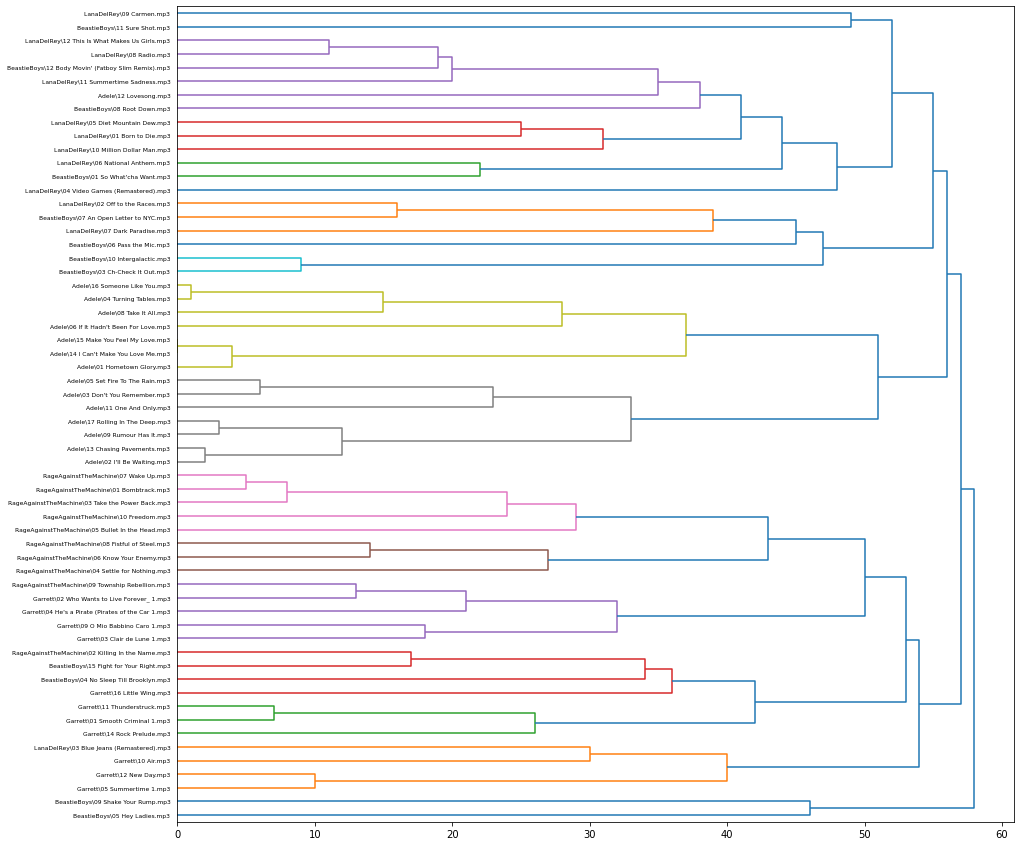

In [338]:
plot_dendrogram(trained_model, labels=index, orientation="right")

Warum sind cluster auf drei gestellt.

### Annahmen:

Zur Überlegung, welche Linkeage und Metrik ideal ist stellen wir einige Annahmen auf:
1. Alle Songs sollen zugewiesen werden
2. Die Playlisten müssen nicht unbedingt gleich groß sein, aber sehr kleine Playlisten sind unerwünscht. 
3. In einer Playlist sollte es mehrere Lieder von einem Artist geben (bestätigung der Ähnlichkeit)

In [ ]:
#Linkage Matrix
Z = linkage(scaled_first_sections, method="ward", metric='euclidean')
print(Z[:10])
#plotting dendrogram
plt.figure(figsize=(15, 15))
dendro = dendrogram(Z, orientation="right", labels=index)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

[[11.   12.    8.89  2.  ]
 [ 3.   13.   10.35  2.  ]
 [ 2.    4.   12.19  2.  ]
 [ 7.   14.   13.46  2.  ]
 [ 0.   60.   15.43  3.  ]
 [ 1.    8.   15.59  2.  ]
 [50.   56.   17.24  2.  ]
 [51.   55.   18.42  2.  ]
 [57.   58.   18.53  2.  ]
 [38.   48.   19.18  2.  ]]


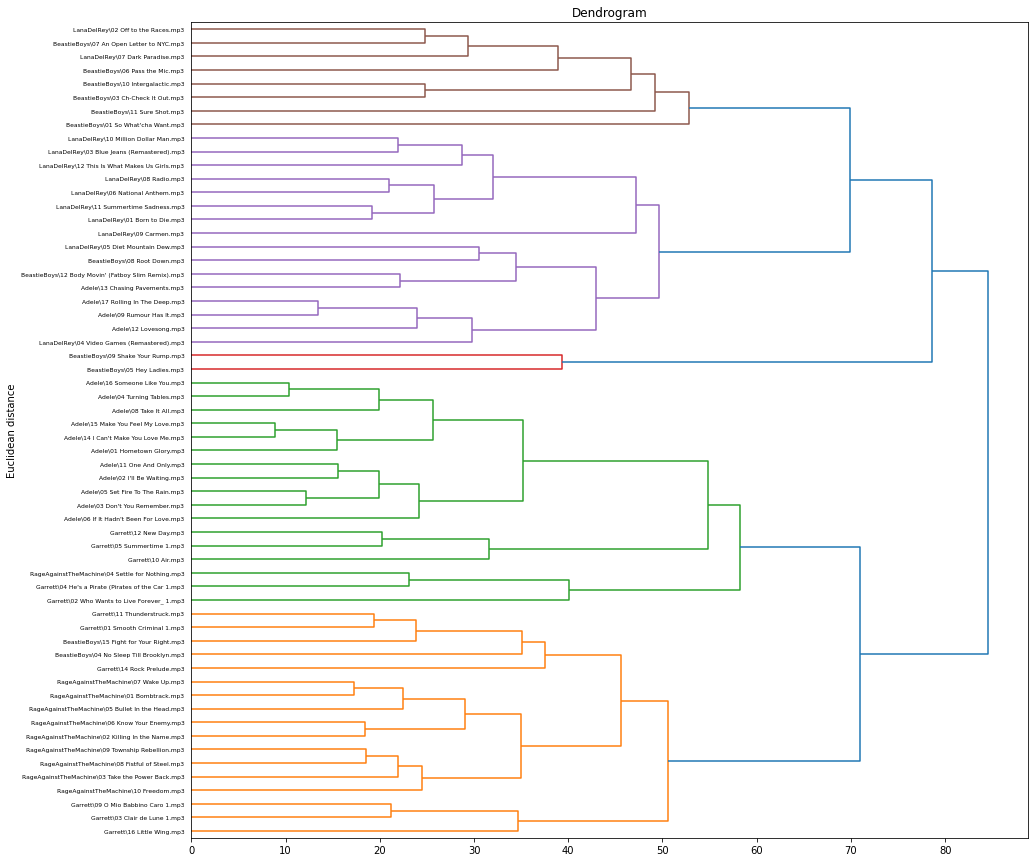

In [339]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='cityblock', linkage='complete')
trained_model = agg_clustering.fit(scaled_first_sections[features_to_use])
labels.labels_

#Linkage Matrix
Z = linkage(scaled_first_sections, metric='cityblock', method="complete")
print(Z[:10])
#plotting dendrogram
plt.figure(figsize=(15, 15))
dendro = dendrogram(Z, orientation="right", labels=index)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
#Linkage Matrix
Z = linkage(scaled_first_sections, method="average", metric='euclidean')
print(Z[:10])
#plotting dendrogram
plt.figure(figsize=(15, 15))
dendro = dendrogram(Z, orientation="right", labels=index)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
#Linkage Matrix
Z = linkage(scaled_first_sections, method="complete", metric='euclidean')
print(Z[:10])
#plotting dendrogram
plt.figure(figsize=(15, 15))
dendro = dendrogram(Z, orientation="right", labels=index)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

Complete mit Eklid bringt nicht die gewünschten Ergebnisse hervor. Die könnte daran liegen, dass complete mit einer Abstandsmethode kombiniert werden sollte, die die Streuung normiert oder begrenzt. Euklid ist daher nicht geeignet. Das Manhatten-Ähnlichkeitsmaß kann ausgeschlossen werden, da es Streuung noch höher gewichtet als Euklid. Deshalb wird im Folgenden das Cosinus-Ähnlichkeitsmaß im Verbund mit der Complete-Metrik getestet.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='complete')
labels = agg_clustering.fit(scaled_first_sections[features_to_use])
labels.labels_

#Linkage Matrix
Z = linkage(scaled_first_sections, metric='cosine', method="complete")
print(Z[:10])
#plotting dendrogram
plt.figure(figsize=(15, 15))
dendro = dendrogram(Z, orientation="right", labels=index)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

Complete funktioniert mit cosine deutlich besser, jedoch ist das clustering fraglich, da Bands mit sehr spezifischem Sound auf ihren Alben in jeder oder zumindest mehreren Playlisten vorkommen. Im Vergleich bevorzugen wir die Kombination aus Ward und Euclid. Die Nachteile der Cosinus Metrik werden größer, wenn man ein Matching benutzt, dass mehr auf Ausreißer achtet. Es lässt sich darauf schließen, dass es bei single und average noch schlechter abschneidet. 

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='complete')
labels = agg_clustering.fit(scaled_first_sections[features_to_use])
labels.labels_

#Linkage Matrix
Z = linkage(scaled_first_sections, metric='cosine', method="complete")
print(Z[:10])
#plotting dendrogram
plt.figure(figsize=(15, 15))
dendro = dendrogram(Z, orientation="right", labels=index)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:
#Linkage Matrix
Z = linkage(scaled_first_sections, metric='cosine', method="average")
print(Z[:10])
#plotting dendrogram
plt.figure(figsize=(15, 15))
dendro = dendrogram(Z, orientation="right", labels=index)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

In [ ]:

#Linkage Matrix
Z = linkage(scaled_first_sections, metric='cityblock', method="complete")
print(Z[:10])
#plotting dendrogram
plt.figure(figsize=(15, 15))
dendro = dendrogram(Z, orientation="right", labels=index)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

Bei verschiedenen Kombinationen lässt sich beobachten, dass sehr unterschiedliche Ergebnisse ausgegeben werden. Cityblock/complete teilt stark nach Artists ein, hat aber eine Playlist mit nur 2 Songs. Überraschend praktikabel ist das ergebnis von Cosine&complete, es werden gleichmäßige Playlisten ausgegeben und diese sind größtenteils, aber nicht strikt nach artist sortiert. Ein wenig fraglich ist jedoch nur die angebliche Ähnlichkeit von Beastie Boys und Lana del Rey.

Überzeugend ist auch das Ergebnis von Ward/euklid, jedoch ist es unerwünscht, dass nur 2 Songs in einer Playlist sind, die bei anderen Metriken oder Linkeage typen in anderen Playlisten unterkommen. Euklid gibt mit anderen Linkeage Typen unerwünschte Ergebnisse, es werden nicht alle Songs zugewiesen.
